## importing liberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [2]:
df = pd.read_csv("database SFRC.csv")

### EDA-Exploratory data Analysis

In [6]:
df.head(8)

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675
5,251.0,150.0,27.3,0.0267,3.0876,0.9750,565.0,1.50,131.0220
6,251.0,150.0,27.5,0.0267,3.0876,0.4000,565.0,0.50,64.7580
7,251.0,150.0,24.9,0.0267,3.0876,0.4000,565.0,0.50,77.1825


In [8]:
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

In [9]:
df.describe()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,264.202971,148.022746,48.991496,0.024563,2.604004,0.539549,470.245824,0.889170,148.364144
std,160.532443,64.874376,25.176735,0.010077,0.947298,0.359614,97.156011,0.549692,149.927020
min,85.250000,50.000000,9.770000,0.003700,0.202900,0.075000,275.862069,0.200000,12.824460
25%,159.000000,100.750000,33.220000,0.017800,2.000000,0.303000,420.000000,0.500000,47.534200
50%,222.000000,150.000000,40.750000,0.023900,2.713200,0.498750,462.000000,0.800000,108.816905
75%,300.000000,200.000000,55.075000,0.030900,3.184700,0.666094,530.000000,1.000000,190.221479
max,1118.000000,610.000000,215.000000,0.057200,5.953500,2.857500,900.000000,4.500000,1430.000000


In [10]:
#independent and target variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [11]:
y.head(10)

0    112.9500
1     79.0650
2    109.1850
3    123.4920
4    111.0675
5    131.0220
6     64.7580
7     77.1825
8     91.1130
9    101.6550
Name: Vu (KN), dtype: float64

In [12]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [13]:
# Train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

### Model Development

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### Model Evaluation

In [15]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,knn.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,knn.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,knn.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,knn.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,knn.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,knn.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,knn.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,knn.predict(X_train)))

The RMSE  on the testing dataset is:  65.02801114266816
The RMSE  on the training dataset is:  63.57476788421082
The MSE  on the testing dataset is:  4228.6422331709755
The MSE  on the training dataset is:  4041.751111531284
The MAE  on the testing dataset is:  34.6996693472653
The MAE  on the training daset is:  30.695206271856414
The r2_score on the testing dataset is:  0.827718972383263
The r2_score on the training dataset is:  0.8154432887928746


### Hyperparameter Tunning (Optimization)

In [16]:
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsRegressor


In [17]:
KNN =  KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [18]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='neg_mean_squared_error')

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [20]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=3, weights='distance')


In [21]:
KNN_O = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 3, weights = 'distance')
KNN_O.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [22]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,grid_search.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,grid_search.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,grid_search.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,grid_search.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,grid_search.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,grid_search.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,grid_search.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,grid_search.predict(X_train)))

The RMSE  on the testing dataset is:  39.617895969783866
The RMSE  on the training dataset is:  5.7198188654359745
The MSE  on the testing dataset is:  1569.5776810726168
The MSE  on the training dataset is:  32.716327853397274
The MAE  on the testing dataset is:  25.30257279770473
The MAE  on the training daset is:  1.2746555308461538
The r2_score on the testing dataset is:  0.9360531251146513
The r2_score on the training dataset is:  0.9985060886470296


### Actual vs predicted Capacity

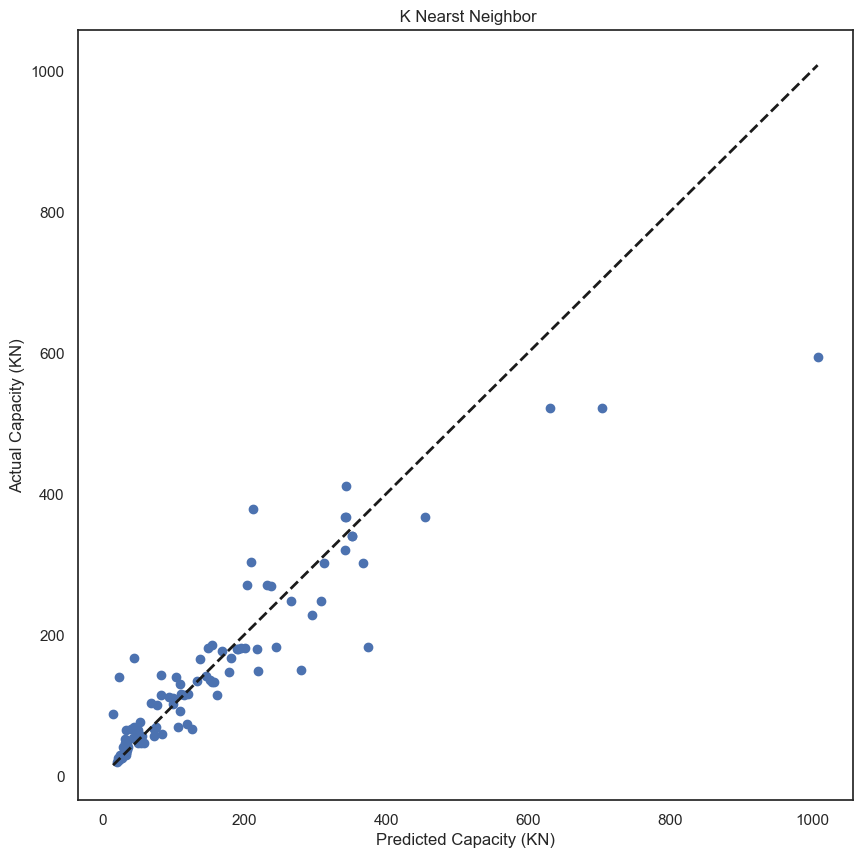

In [38]:
plt.figure(figsize=(10,10))
sns.set_style("white")
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title(" K Nearst Neighbor")
plt.scatter(y_test,KNN.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### Pickling The Model For Deployment

In [23]:
import pickle
with open('grid_search_pkl', 'wb')as f:
    pickle.dump(grid_search,f)

In [24]:
pickled_model = pickle.load(open('grid_search_pkl', 'rb'))

In [26]:
pickled_model.predict(scaler.transform(X_test.iloc[0].values.reshape(1, -1)))

array([30.57838528])

In [27]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([30.57838644])